<a href="https://colab.research.google.com/github/youngchanseo/Hon.Gong.Machine-SNU/blob/main/(03_3_5)_Ridge_p160.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/youngchanseo/Hon.Gong.Machine-SNU/main/(03_3_0)_RAW%20Data%ED%8A%B9%EC%84%B1%EA%B3%B5%ED%95%99_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%A4%80%EB%B9%84.csv')
# 또는 df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()

#https://bit.ly/perch_data
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

#그 다음 perch_full과 perch_weight를 훈련 세트와 테스트 세트로 나눔
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state =42 )

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures (degree=5, include_bias = False) # 5제곱까지
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [4]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print("trained ridge score: ",ridge.score(train_scaled, train_target))
print("tested ridge score: ",ridge.score(test_scaled, test_target))

print(ridge)

trained ridge score:  0.9896101671037343
tested ridge score:  0.9790693977615387
Ridge()


확실히 많은 트성을 사용헀음에도 훈련세트에 너무 과대적합되지 않아, 테스트 세트에서도 좋은 성능을 내고 있음

Hyperparameter: 머신러닝 모델이  사람이 알려줘야 하는 파라미터. (ex: alpha값)
사이킷런과 같은 머신러닝 라이브러리에서는 class와 method의 매개변수로 표현됨

Ridge와 Lasso model을 사용할때 규제의 양을 임의로 조절할 수있음.
모델의 객체를 만들 때 alpha 매개변수로 규제의 강도를 조절함.
alpha의 값이 크면, 규제 강도가 세지므로, 계수 값을 더 줄이고,
조금 더 과소 적합되도록 유도함.
alpha 값이 작으면 계수를 줄이는 역할이 줄어들고, 선형 모델과 유사해지므로 과대적합될 가능성이 있음


In [6]:
# 적절한 alpha 찾기: alpha에 대한 R^2값의 그래프를 그려봄
#훈련 세트와 테스트 세트의 점수가 가장 가까운 지점이 최적의 alpha값이 됨

import matplotlib.pyplot as plt
train_score = []
test_score = []

In [7]:
#alpha 값을 0.001에서 100까지 10배씩 늘려가며 릿지 회귀 모델을 훈련 한 다음 훈련세트와 테스트 세트의 점수를 파이썬 리스트에 저장

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:

  # Ridge model을 만듦
  ridge = Ridge(alpha=alpha)
  #Ridge model을 훈련
  ridge.fit(train_scaled, train_target)
  #훈련 점수와 테스트 점수를 저장
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

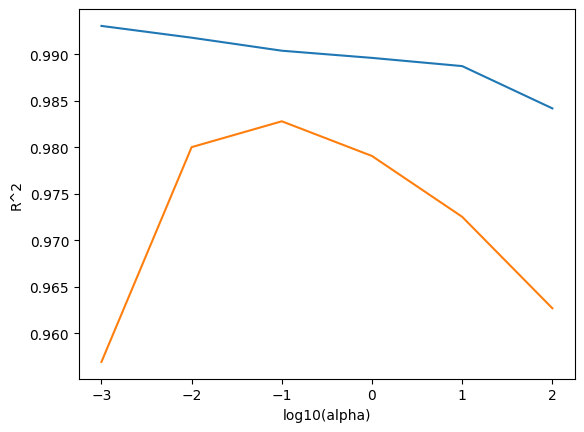

In [9]:
# 그래프그리기

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('log10(alpha)')
plt.ylabel('R^2')
plt.show()

파랑(위): 훈련세트 그래프, 오렌지(아래): 테스트 세트 그래프

테스트 세트의 점수가 가장 높은 alpha = 10^-1일때 최종 모델 훈련하기로 결정함

In [12]:
# Ridge model을 만듦
ridge = Ridge(alpha=0.1)
#Ridge model을 훈련
ridge.fit(train_scaled, train_target)
#훈련 점수와 테스트 점수를 저장
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570367
0.9827976465386928
